<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0517/0517_scikit_learn_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5_%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8E%E1%85%A5%E1%84%85%E1%85%B5(%EC%88%98%EC%97%85%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 (Data Preprocessing)

데이터 전처리는 데이터 분석 및 머신러닝 학습을 위해서 매우 중요한 단계 입니다. 실무 프로젝트에서는 전체 프로젝트 기간 중 평균 50~70% 이상 시간을 전처리 및 EDA에 투자한다고 합니다. 그만큼 좋은 전처리를 하면 할수록 좋은 성능을 내는 머신러닝 모델을 만들 수 있습니다.

이번 주제는 바로 전처리(pre-processing) 입니다.

scikit-learn 패키지를 활용한 전처리를 알아보도록 하겠습니다.

In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

## 1. 결측치 (MissingData)

In [2]:
df = pd.DataFrame([
    [2, 1, 3],
    [3, 2, 5],
    [3, np.nan, 7],
    [5, np.nan, 10],
    [7, 5, 12],
    [2, 5, 7],
    [8, 9, 13],
    [9, 10, 13],
    [6, 12, 12],
    [9, 2, 13],
    [6, 10, 12],
    [2, 4, 6]
], columns=['hour', 'attendance', 'score'])

df

,hour,attendance,score
0,2,1.0,3
1,3,2.0,5
2,3,NaN,7
3,5,NaN,10
4,7,5.0,12
5,2,5.0,7
6,8,9.0,13
7,9,10.0,13
8,6,12.0,12
9,9,2.0,13


In [ ]:
pd.to_numeric(df['attendance'], errors = 'coerce') # 에러나도 무시하고 타입 바꿔라
# 결측치가 NaN이 아닌 값은 사람이 찾아서 바꿔줘야 함

### 결측치 확인

In [3]:
df.isnull().sum() # NaN 값 아니면 안나옴 예) -, 결측, 띄어쓰기 잘못 등..

hour          0
attendance    2
score         0
dtype: int64

In [4]:
df.info() # NaN 값 아니면 안나옴(위와 동일)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        12 non-null     int64  
 1   attendance  10 non-null     float64
 2   score       12 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 416.0 bytes


In [ ]:
# 데이터 없는 부분 시각화
sns.heatmap(df[['attendance']], annot = True) # annot: 숫자도 넣어서 보여달라
# 값의 크기에 따라서 색으로 표시해 줌

<Axes: >

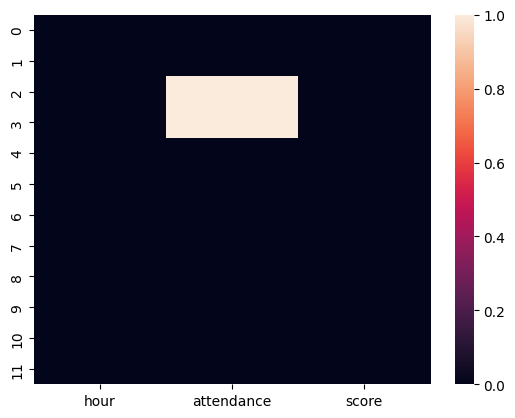

In [9]:
sns.heatmap(df.isnull())  # 빈 공간이 결측치 있는 곳, attendence의 2,3번쯤이 결측치인 것을 알 수 있음

### 결측치 처리 - pandas 

In [10]:
# 제거 
df.dropna() # row에서 결측치 없애버림, 기본 axis = 0(가로방향), 1로 주면 column이 통째로 없어짐

,hour,attendance,score
0,2,1.0,3
1,3,2.0,5
4,7,5.0,12
5,2,5.0,7
6,8,9.0,13
7,9,10.0,13
8,6,12.0,12
9,9,2.0,13
10,6,10.0,12
11,2,4.0,6


fillna - 결측치 채우기

In [ ]:
# fillna - 결측치 채우기 (pandas) # 아무거나 넣어도 데이터에 영향 x일 때 넣음
#bfill : 결측치 뒤에 있는 것 중에 결측치 채움 
#ffilll : 결측치 앞에 있는 것 중에 결측치 채움

df.fillna(method = 'ffill')

In [ ]:
val = np.mean(df['attendance'])
df.fillna(val) # 내가 값을 구해서 넣을 수 있음

,hour,attendance,score
0,2,1.0,3
1,3,2.0,5
2,3,6.0,7
3,5,6.0,10
4,7,5.0,12
5,2,5.0,7
6,8,9.0,13
7,9,10.0,13
8,6,12.0,12
9,9,2.0,13


### 결측치 처리 - Sklearn(전처리 클래스)

##### 전처리 클래스 쓰는 법 
1. import 원하는 클래스 
2. 인스터스 생성 
3. 메서드 
    1. fit : 계산 (전체 데이터 or 학습 데이터)
    2. transform : 데이터 조작 
    3. fit_transform : 계산 + 데이터 조작(전체 데이터 or 학습 데이터)

##### 결측치는 train기준
- 보통 전처리 후 train/test데이터를 나누나 미리 나눠진 경우 존재

 - test데이터 결측치는 train데이터 기준으로 결측치를 채워야 함 / 데이터 오염 방지 위해
   - 결측치 : 평균일 때 Train :6/ test: 4라도 test는 6으로 채움
 - 전처리는 학습데이터에 하고 그 기준으로 test데이터도 전처리 

In [ ]:
X_train = np.array([1, 2, 3, np.nan, 4]).reshape(5, 1)
X_test = np.array([3, 4, 5, np.nan, 1]).reshape(-1, 1)

In [ ]:
# 객체 생성 
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

SimpleImputer()

In [ ]:
imputer.transform(X_train)
imputer.transform(X_test)

array([[3. ],
       [4. ],
       [5. ],
       [2.5],
       [1. ]])

In [14]:
from sklearn.impute import SimpleImputer # 옵션 strategy : 전략, 평균, 중앙값, 최빈값, 상수 넣을 수 있음

In [ ]:
imputer = SimpleImputer(strategy='most_frequent') # 객체 생성
# imputer는 계산해야 하니까 fit을 해줌 / fit : 계산한다
imputer.fit(df) # 계산
data_filled = imputer.transform(df) # 계산한 값에 대해 결측치 채움 / transform이 데이터 변경해줌('저장 안되니' 꼭 변수에 넣어줄 것)

In [ ]:
data_filled

array([[ 2.,  1.,  3.],
       [ 3.,  2.,  5.],
       [ 3.,  2.,  7.],
       [ 5.,  2., 10.],
       [ 7.,  5., 12.],
       [ 2.,  5.,  7.],
       [ 8.,  9., 13.],
       [ 9., 10., 13.],
       [ 6., 12., 12.],
       [ 9.,  2., 13.],
       [ 6., 10., 12.],
       [ 2.,  4.,  6.]])

In [16]:
# 중간값을 기준으로 결측치를 채워넣으세요 
imputer = SimpleImputer(strategy='median') 
imputer.fit(df)
data_filled = imputer.transform(df)

In [ ]:
df

In [ ]:
#@title
imputer = SimpleImputer(strategy='median')
imputer.fit(df)
data_filled = imputer.transform(df)
data_filled

데이터가 학습 데이터와 테스트 데이터로 나누어 진 경우는 반드시 fit() 함수와 transform() 함수를 따로 사용
- train데이터를 기준으로 fit을 시킨 후 해당 imputer 객체로 test데이터 transform

## 스케일링 - 수치형 데이터 

수치형 데이터만 가능해서 꼭 데이터 type을 확인해야 합니다.

특성 스케일링(feature scaling)
- 특성들의 범위가 같은 크기를(최대 - 최소) 갖도록 특성별로 값을 비례적으로 조정, 데이터의 크기가 특정 범위 안에 들어오게 하기

거리 기반 머신 러닝 모델 (선형회귀모델, k-최근접 이웃 모델, 서포트 벡터 머신 모델)과 딥러닝 모델은 특성들의 사이의 범위가 크고 작음에 민감하기 때문에, 단위를 일정하게 맞추는 작업을 진행해야 합니다. 

사이킷런에서 제공하는 스케일링은 여러 개가 있는데, 그 중 대표는 다음 네 개이다. 

- StandardScaler: 기본 스케일, 평균과 표준편차 사용, 이상치에 민감 (이상치 있으면 스케일링 값이 차이가 많이 나게됨)
- MinMaxScaler: 최대값이 1, 최소값이 0이 되도록 스케일링, 이상치에 민감
- MaxAbsScaler: 최대절대값이 1, 최소절대값이 0이 되도록 스케일링 (범위 지정)
- RobustScaler: 중앙값과 IQR을 사용. 아웃라이어의 영향을 최소화함 (이상치에 둔감)

그 중에서도 가장 대표적인 StandardScaler(Standardization)과 MinMaxScaler(Normalization)을 살펴보자

### StandardScaler : 표준화(Standardization)

정규분포를 가장한 모델들은 잘 맞는다. (예> 선형회귀)

표준화는 데이터의 평균을 0 분산 및 표준편차를 1로 만들어 줍니다.

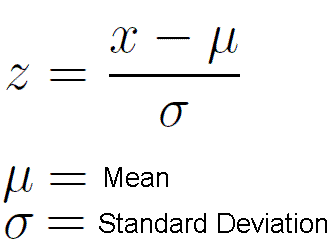

- 표준화를 하면 평균은 0, 분산과 표준편차는 1로 만들어 데이터의 분포를 단순화 시키고, 비교를 용이하게 합니다.
- 또한,  대부분의 통계 분석 방법이 정규성 가정을 기반으로 하므로 완벽하지 않더라도 최대한 정규분포로 변환하는 노력이 필요하다.

In [39]:
from sklearn.datasets import load_iris

# iris 데이터를 가져옵니다.
iris = load_iris()
x = iris['data']
y = iris['target']

In [19]:
x.shape

(150, 4)

In [ ]:
x

In [ ]:
x[:, 0:2] # 데이터 처음부터 끝까지, 0부터 2까지 인덱스 값만 가져와라

In [18]:
# 4개의 feature 데이터 중 1개의 feature만 임의로 선택합니다.

X = x[:, 0] # 데이터는 150개 다 가져오되, 0번째 인덱스 값만 가져와라 [0,1,2,3]중 0번째값들만 가져온것
X

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [ ]:
#  직접 구현해보겠습니다.
X_std = (X - X.mean()) / X.std()
X_std

array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904,
       -0.53717756, -1.50652052, -1.02184904, -1.74885626, -1.14301691,
       -0.53717756, -1.26418478, -1.26418478, -1.87002413, -0.05250608,
       -0.17367395, -0.53717756, -0.90068117, -0.17367395, -0.90068117,
       -0.53717756, -0.90068117, -1.50652052, -0.90068117, -1.26418478,
       -1.02184904, -1.02184904, -0.7795133 , -0.7795133 , -1.38535265,
       -1.26418478, -0.53717756, -0.7795133 , -0.41600969, -1.14301691,
       -1.02184904, -0.41600969, -1.14301691, -1.74885626, -0.90068117,
       -1.02184904, -1.62768839, -1.74885626, -1.02184904, -0.90068117,
       -1.26418478, -0.90068117, -1.50652052, -0.65834543, -1.02184904,
        1.40150837,  0.67450115,  1.2803405 , -0.41600969,  0.79566902,
       -0.17367395,  0.55333328, -1.14301691,  0.91683689, -0.7795133 ,
       -1.02184904,  0.06866179,  0.18982966,  0.31099753, -0.29484182,
        1.03800476, -0.29484182, -0.05250608,  0.4321654 , -0.29

<ipython-input-29-31161f64c9ba>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X, bins=5, color='b')
<ipython-input-29-31161f64c9ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_std, bins=5, color='r')


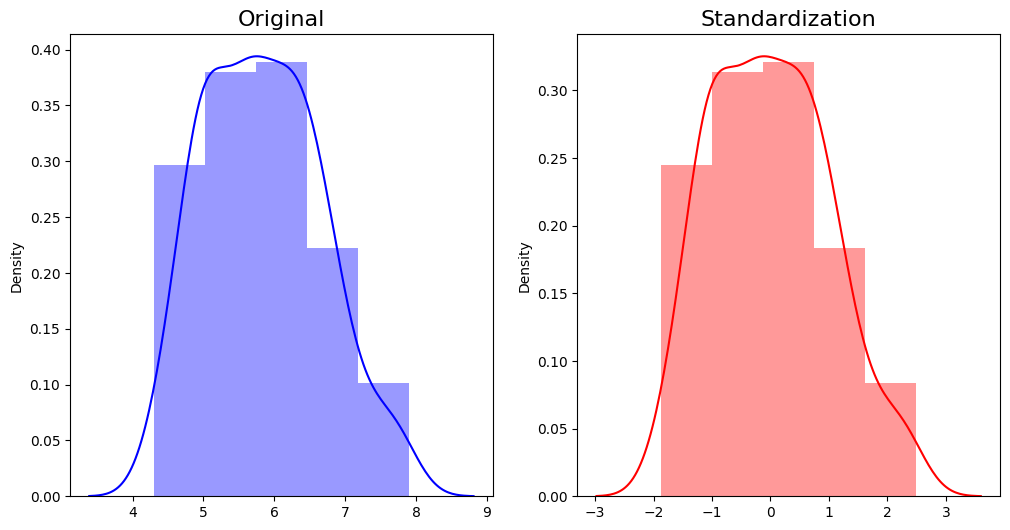

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b')
plt.title('Original', fontsize=16)

plt.subplot(1, 2, 2)
sns.distplot(X_std, bins=5, color='r')
plt.title('Standardization', fontsize=16)
plt.show() # 모양이 줄지는 않음, 스케일이 줄고 평균값이 바뀜

### Sklearn StandardScaler 사용

In [22]:
from sklearn.preprocessing import StandardScaler
# 전처리 관련은 sklearn.preprocessing에 거의 다 있음
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)
x_scaled

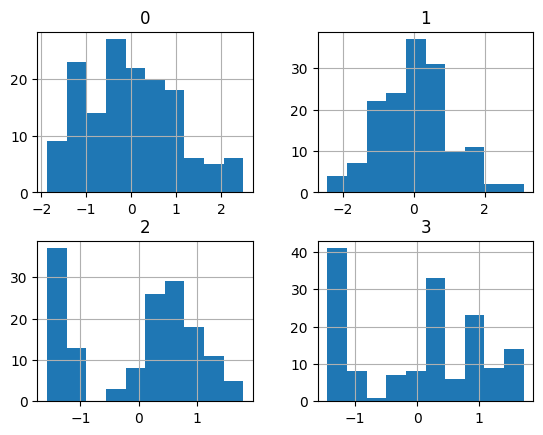

In [25]:
pd.DataFrame(x_scaled).hist()
plt.show()

In [ ]:
train_X = np.array([-3, -2, -1, 0, 1, 2, 3])
test_X  = np.array([1, 2, 3, -1])

In [ ]:
U = train_X.mean() # 평균
U

0.0

In [ ]:
S = train_X.std()# 표준편차
S

2.0

In [ ]:
(train_X - U) / S # 평균 / 표준편차

array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

In [ ]:
(test_X - U) / S # train_X와 같은 값을 넣어준다

array([ 0.5,  1. ,  1.5, -0.5])

### MinMax Scaler : 정규화(Normalization)

- 정규화 (Normalization)도 표준화와 마찬가지로 데이터의 스케일을 조정합니다.

- 정규화가 표준화와 다른 가장 큰 특징은 모든 데이터가 0 ~ 1 사이의 값을 가집니다.

- 즉, 최대값은 1, 최소값은 0으로 데이터의 범위를 조정합니다.

- 이럴 때 씁니다
 - 1. 정규분포랑 거리가 멀 때
 - 2. 데이터의 순서가 중요하다
 - 3. 모델에 거리 계산이 들어간다

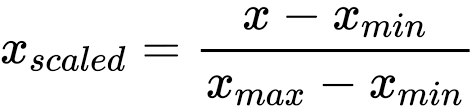

In [36]:
# 샘플 데이터를 로드합니다.
X = x[:, 0]

In [ ]:
X_mm = (X - X.min()) / (X.max() - X.min())

<ipython-input-34-896a325fcdf6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X, bins=5, color='b', kde = False)
<ipython-input-34-896a325fcdf6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_mm, bins=5, color='r', kde = False)


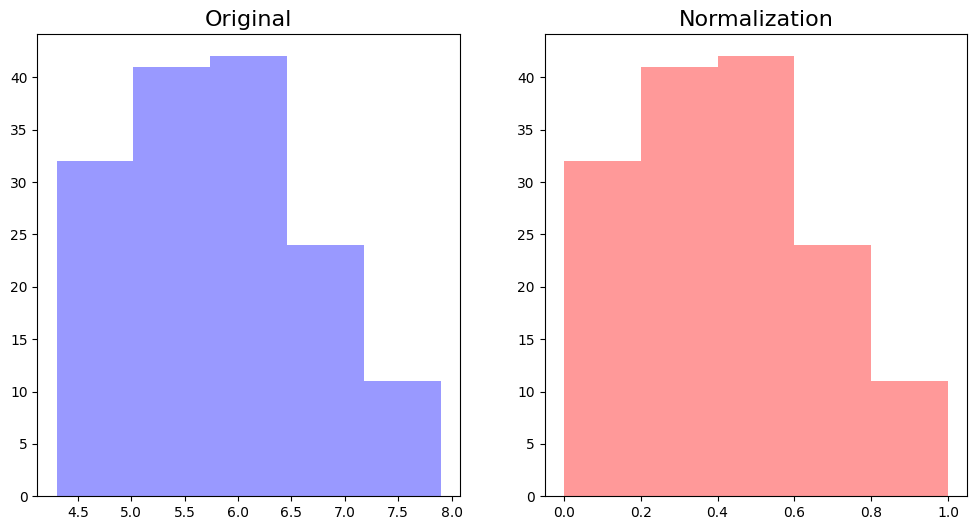

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b', kde = False)
plt.title('Original', fontsize=16)

plt.subplot(1, 2, 2)
sns.distplot(X_mm, bins=5, color='r', kde = False)
plt.title('Normalization', fontsize=16)
plt.show() # x값이 0에서 1사이로 변했다

### Sklearn MinMaxScaler 사용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

In [ ]:
x_scaled_mm = scaler_mm.fit_transform(x)
x_scaled_mm

In [ ]:
x_scaled_mm.min(), x_scaled_mm.max()

(0.0, 1.0)

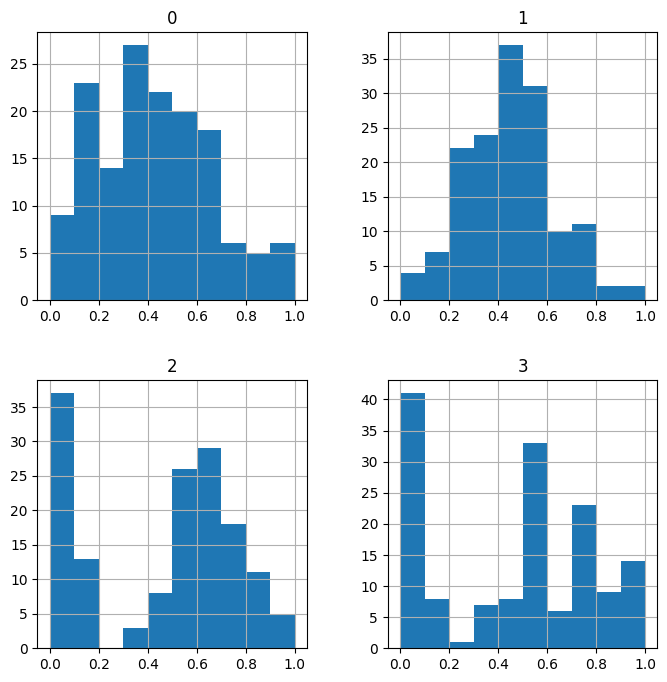

In [ ]:
pd.DataFrame(x_scaled_mm).hist(figsize=(8,8))
plt.show()

In [55]:
# 직접 해보세요 
data = [[10, 20, 30],
        [100, 200, 300],
        [1000, 2000, 3000]]


In [56]:
from sklearn.preprocessing import MinMaxScaler

data_mm = MinMaxScaler()

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 원본 데이터
data = np.array([[10, 20, 30],
                 [100, 200, 300],
                 [1000, 2000, 3000]])

# 표준화 수행
scaler_std = StandardScaler()
data_std = scaler_std.fit_transform(data)

# 정규화 수행
scaler_norm = MinMaxScaler()
data_norm = scaler_norm.fit_transform(data)


In [ ]:
data_std

In [ ]:
data_norm

## 인코딩 - 카테고리형 데이터

학습 데이터의 특성들은 수치값 뿐만 아니라 ‘크다’, ‘중간’, ‘작다’ 또는 ‘여자’, ‘남자’와 같은 범주값도 존재합니다. 그런데 머신러닝 알고리즘은 문자열 데이터를 입력으로 받지 못합니다.

따라서, 데이터가 가지고 있는 범주형(Categorical) 데이터는 반드시 숫자형(Numerical)으로 변환해주어야 합니다.

인코딩(encoding) 이란, 문자형 -> 숫자형 데이터로 변환 해주는 것을 의미합니다.

이때, 1등급, 2등급, 3등급 처럼 의미에 대소관계, 순위적 연속성 등이 있으면 라벨 인코딩으로 처리를 합니다.

성별, 과일 등 순위관계가 없으면 각각을 벡터로 치환하는 원핫인코딩을 진행합니다.

One-Hot Encoding
- yes or no로 설정해서 하나하나 column으로 만들어 줌
- 크기에 영향을 받지 않음
- column의 수가 계속 늘어나게 됨
- 데이터가 기하급수적으로 많이 필요하게 됨

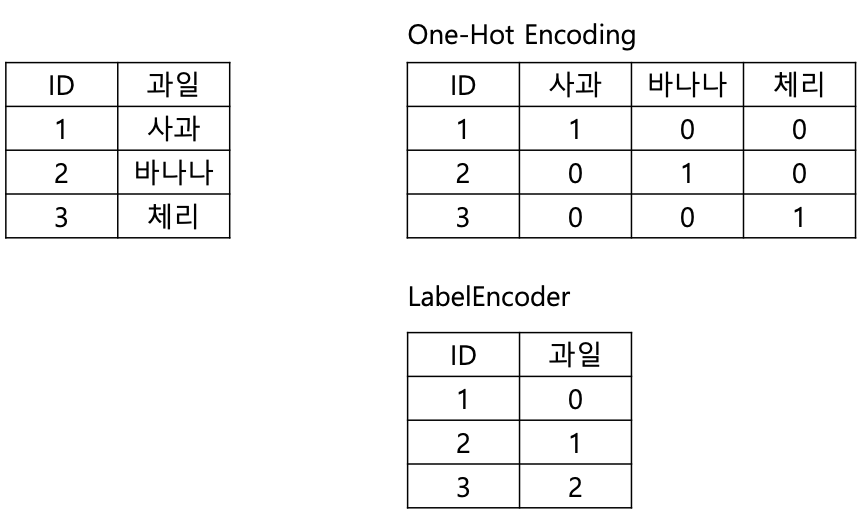

In [44]:
# 샘플데이터 로드 
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
tips['day'].value_counts()
# 대소관계가 없으니 one_hot encoding(정석), 판단 애매하면 둘다 쓰고 성능 좋은 것 사용하면 됨

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

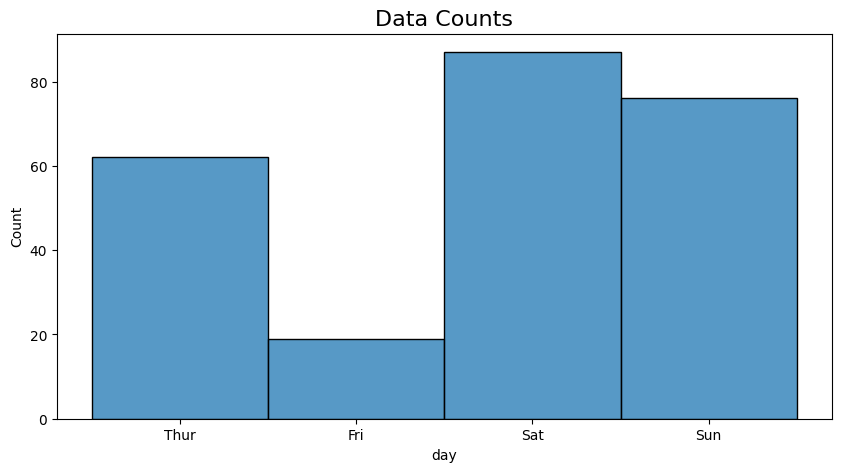

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(tips['day'])
plt.title('Data Counts', fontsize=16)
plt.show()

만약 tips데이터의 day컬럼에서의 값(value)인 [Thur(목), Fri(금), Sat(토), Sun(일)] 을 인코딩(encoding) 해주지 않고 그대로 머신러닝 모델에 학습데이터로 feed한다면 error가 발생합니다.

### Label Encoder 

In [46]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
lb_encoded = lb_enc.fit_transform(tips['day']) # 한번에 1개의 열만 가능
# 단, 1번에 1개만 가능, fit하면 다시 리셋됨
# 쓰려면 lb_enc1 = LabelEncoder() > day , lb_enc2 = LabelEncoder() > smoker 등으로 나눠서 사용해야 함 

In [ ]:
tips.day.values

['Sun', 'Sun', 'Sun', 'Sun', 'Sun', ..., 'Sat', 'Sat', 'Sat', 'Sat', 'Thur']
Length: 244
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [47]:
lb_encoded

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [ ]:
# 장점 1 LabelEncoder를 사용하면 원래 class 의 label도 확인할 수 있습니다.
lb_enc.classes_

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [ ]:
# 장점 2 원래의 정보로 되돌릴 수 있습니다. 양방향 사용 가능
lb_enc.inverse_transform([0, 0, 1, 2, 3, 1, 2, 3]) # inverse_transform: 원래 정보대로 되돌아 옴

array(['Fri', 'Fri', 'Sat', 'Sun', 'Thur', 'Sat', 'Sun', 'Thur'],
      dtype=object)

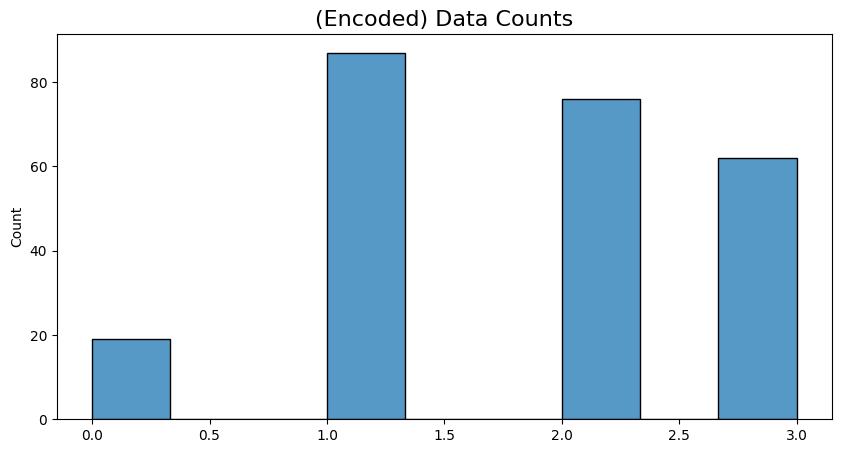

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(lb_encoded)
plt.title('(Encoded) Data Counts', fontsize=16)
plt.show()

### OneHotEncoder

In [49]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder()

In [51]:
encoded = oh_encoder.fit_transform(tips[['day']])

In [52]:
encoded # sparse matrix : 데이터에 0이 많은 것을 따로 저장해 놓은 것

<244x4 sparse matrix of type '<class 'numpy.float64'>'
	with 244 stored elements in Compressed Sparse Row format>

In [54]:
oh_encoder.categories_

[array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)]

In [ ]:
encoded.toarray() # array로 변경하면 어떻게 생겼는지 볼 수 있음

In [ ]:
oh_encoder.inverse_transform(encoded.toarray()) # 원상복구 가능

In [ ]:
df_enc = pd.DataFrame(encoded.toarray(), columns = oh_encoder.categories_) # 정석:  pd.DataFrame 붙여줌
df_enc

,Fri,Sat,Sun,Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
239,0.0,1.0,0.0,0.0
240,0.0,1.0,0.0,0.0
241,0.0,1.0,0.0,0.0
242,0.0,1.0,0.0,0.0


In [ ]:
df_enc.sum()

Fri     19.0
Sat     87.0
Sun     76.0
Thur    62.0
dtype: float64

In [ ]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### pandas : get_dummies

In [ ]:
pd.get_dummies(tips['day']) # train 데이터에 split되어 있으면 쓰면 안 됨, 카테고리가 둘 다 똑같지 않으면 쓸 수 없음

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0
